In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

data = pd.read_csv("german_credit.csv")

In [3]:
data.shape

(1000, 21)

In [4]:
from sklearn.model_selection import train_test_split
out_data,df =train_test_split(data, train_size = 0.5,random_state=5)
print (df.shape)
print (df.columns)
df.head(5)

(500, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
544,0,no checking account,12,critical account/ other credits existing (not ...,car (new),1255,... < 100 DM,.. >= 7 years,4,male : single,...,4,real estate,61,none,own,2,unskilled - resident,1,none,yes
515,0,< 0 DM,6,critical account/ other credits existing (not ...,car (new),609,... < 100 DM,4 <= ... < 7 years,4,female : divorced/separated/married,...,3,if not A121 : building society savings agreeme...,37,none,own,2,skilled employee / official,1,none,no
193,0,no checking account,6,existing credits paid back duly till now,domestic appliances,2108,... < 100 DM,4 <= ... < 7 years,2,male : married/widowed,...,2,real estate,29,none,rent,1,skilled employee / official,1,none,yes
11,1,< 0 DM,48,existing credits paid back duly till now,business,4308,... < 100 DM,... < 1 year,3,female : divorced/separated/married,...,4,if not A121 : building society savings agreeme...,24,none,rent,1,skilled employee / official,1,none,yes
279,0,no checking account,24,existing credits paid back duly till now,domestic appliances,1901,100 <= ... < 500 DM,1 <= ... < 4 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",29,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes


In [5]:
# Lets build a Ensemble model but need to modify the dataset first
obj_data=df.select_dtypes(include=['object'])
obj_data.head()

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
544,no checking account,critical account/ other credits existing (not ...,car (new),... < 100 DM,.. >= 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
515,< 0 DM,critical account/ other credits existing (not ...,car (new),... < 100 DM,4 <= ... < 7 years,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,none,own,skilled employee / official,none,no
193,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,4 <= ... < 7 years,male : married/widowed,none,real estate,none,rent,skilled employee / official,none,yes
11,< 0 DM,existing credits paid back duly till now,business,... < 100 DM,... < 1 year,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,none,rent,skilled employee / official,none,yes
279,no checking account,existing credits paid back duly till now,domestic appliances,100 <= ... < 500 DM,1 <= ... < 4 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",none,rent,management/ self-employed/ highly qualified em...,"yes, registered under the customers name",yes


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [6]:
# Print Shape of model data
dummy_df=pd.get_dummies(df, columns=['account_check_status','credit_history','purpose','savings',
       'present_emp_since','personal_status_sex', 'other_debtors','property','other_installment_plans', 'housing','job','foreign_worker'])

dummy_df.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,telephone,account_check_status_0 <= ... < 200 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,foreign_worker_no,foreign_worker_yes
544,0,12,1255,4,4,61,2,1,none,0,...,0,0,1,0,0,0,0,1,0,1
515,0,6,609,4,3,37,2,1,none,0,...,0,0,1,0,0,1,0,0,1,0
193,0,6,2108,2,2,29,1,1,none,0,...,0,0,0,1,0,1,0,0,0,1
11,1,48,4308,3,4,24,1,1,none,0,...,0,0,0,1,0,1,0,0,0,1
279,0,24,1901,4,4,29,1,1,"yes, registered under the customers name",0,...,0,0,0,1,1,0,0,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [7]:
dummy_df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,foreign_worker_no,foreign_worker_yes
default,1.000000,0.189013,0.070793,0.076910,-0.018783,-0.208031,-7.768506e-02,-0.007942,0.095893,0.242513,...,0.064980,0.015202,-0.082987,0.084166,-5.401936e-02,0.073887,0.012342,-0.046812,-0.090511,0.090511
duration_in_month,0.189013,1.000000,0.583234,0.132995,0.038559,-0.047340,-1.173177e-02,0.047776,0.053787,0.078898,...,0.125984,0.160763,-0.068555,-0.043901,1.127425e-01,0.098934,-0.010218,-0.210945,-0.107492,0.107492
credit_amount,0.070793,0.583234,1.000000,-0.293030,0.008133,-0.021072,-2.379818e-02,0.096744,0.079207,0.033106,...,0.042606,0.120961,-0.068282,-0.013754,2.420019e-01,-0.036624,-0.000716,-0.163578,-0.001604,0.001604
installment_as_income_perc,0.076910,0.132995,-0.293030,1.000000,0.049682,0.074678,9.279230e-02,-0.054737,-0.056638,0.049035,...,0.032360,0.072975,0.031787,-0.092549,3.636871e-02,0.072912,-0.148908,-0.059748,-0.081714,0.081714
present_res_since,-0.018783,0.038559,0.008133,0.049682,1.000000,0.264617,6.319960e-02,0.036469,-0.052684,0.054668,...,-0.097724,0.226768,-0.290726,0.162059,3.685817e-02,-0.020635,-0.036524,0.007409,-0.046633,0.046633
age,-0.208031,-0.047340,-0.021072,0.074678,0.264617,1.000000,1.575504e-01,0.131840,-0.069895,-0.046800,...,-0.048782,0.275606,0.036990,-0.253642,1.709221e-01,-0.162066,0.070415,0.019335,0.005439,-0.005439
credits_this_bank,-0.077685,-0.011732,-0.023798,0.092792,0.063200,0.157550,1.000000e+00,0.110503,-0.032241,-0.023891,...,-0.013791,-0.004673,0.055764,-0.060799,-1.018924e-02,-0.019019,0.039991,0.015736,0.023410,-0.023410
people_under_maintenance,-0.007942,0.047776,0.096744,-0.054737,0.036469,0.131840,1.105033e-01,1.000000,-0.081756,0.107083,...,-0.012726,0.162010,-0.031423,-0.087722,1.485457e-02,-0.075011,-0.036318,0.091192,0.009501,-0.009501
account_check_status_0 <= ... < 200 DM,0.095893,0.053787,0.079207,-0.056638,-0.052684,-0.069895,-3.224129e-02,-0.081756,1.000000,-0.360488,...,0.006225,-0.018983,0.014783,-0.002537,4.993417e-02,-0.090940,0.075069,0.036303,-0.035726,0.035726
account_check_status_< 0 DM,0.242513,0.078898,0.033106,0.049035,0.054668,-0.046800,-2.389092e-02,0.107083,-0.360488,1.000000,...,-0.042612,0.092733,-0.128686,0.077583,-2.466761e-02,0.030012,-0.042746,0.002116,0.084764,-0.084764


In [8]:
cor= dummy_df.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.55) | (cor< -0.55)]

credit_amount                                            duration_in_month                                                             0.583234
credit_history_existing credits paid back duly till now  credit_history_critical account/ other credits existing (not at this bank)   -0.670328
savings_unknown/ no savings account                      savings_... < 100 DM                                                         -0.609828
personal_status_sex_male : single                        personal_status_sex_female : divorced/separated/married                      -0.766802
other_debtors_none                                       other_debtors_co-applicant                                                   -0.678394
                                                         other_debtors_guarantor                                                      -0.690725
other_installment_plans_none                             other_installment_plans_bank                                                 -0

In [9]:
cor

default             default                                                                       0.000000
                    duration_in_month                                                             0.000000
                    credit_amount                                                                 0.000000
                    installment_as_income_perc                                                    0.000000
                    present_res_since                                                             0.000000
                    age                                                                           0.000000
                    credits_this_bank                                                             0.000000
                    people_under_maintenance                                                      0.000000
                    account_check_status_0 <= ... < 200 DM                                        0.000000
                    account_check_sta

### Drop the original variables which are converted to dummy

Original Variables are anyways dropped after creating dummies. Therefore I am only dropping the variables which aren't relevant

In [10]:
dummy_df=dummy_df.drop(["telephone","foreign_worker_yes","job_unskilled - resident","housing_rent","other_installment_plans_bank","other_debtors_co-applicant"],axis=1)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [11]:
from sklearn.model_selection import train_test_split

y = dummy_df['default']
X = dummy_df.loc[:, dummy_df.columns != 'default']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 54), (150, 54), (350,), (150,))

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfm=rf.fit(X_train, y_train)

C:\Users\malash01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [14]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [15]:
confusion_matrix(y_test, y_pred)

array([[95,  1],
       [42, 12]], dtype=int64)

In [16]:
accuracy_score(y_test, y_pred)

0.7133333333333334

### Q6 Show the list of the features importance( 1 Marks)

Text(0.5,0,'Relative Importance')

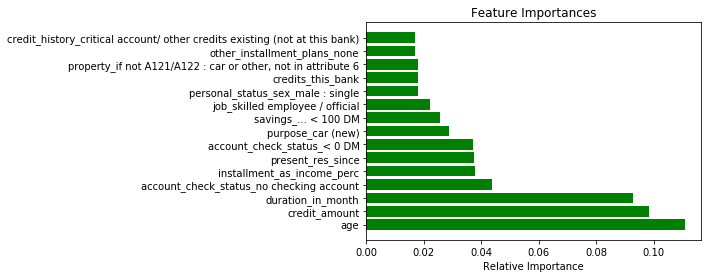

In [17]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = dummy_df.columns[:]
features= a.drop('default',1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [18]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)


In [19]:
print("Train Accuracy: ", trainResult*100.0 )

Train Accuracy:  100.0


In [20]:
print("Test Accuracy: ", testResult*100.0)

Test Accuracy:  71.33333333333334


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [22]:
# Use below values
num_folds = 10
seed = 77

In [23]:
#Validate the Random Forest model build above using k fold

In [24]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [25]:
results = cross_val_score(rfm,X, y, cv=kfold)
print(results)

[0.7  0.76 0.76 0.86 0.8  0.78 0.82 0.8  0.68 0.78]


In [26]:
#Calculate Mean score

In [27]:
np.mean(abs(results))

0.774

In [28]:
# Calculate score standard deviation using std()

In [29]:
results.std()

0.05063595560468864

# Q8 Print the confusion matrix( 1 Marks)

In [30]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[95,  1],
       [42, 12]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [31]:
#Accuracy from Confusion Matrix: 
(cfm[0,0]+cfm[1,1])/(cfm[0,0] + cfm[0,1] + cfm[1,0] + cfm[1,1])

0.7133333333333334

In [32]:
#sensitivity (or True Positive Rate or Recall)-Class 0:

cfm[0,0]/(cfm[0,0] + cfm[0,1])

0.9895833333333334

In [33]:
#sensitivity (or True Positive Rate or Recall)-Class 1:

cfm[1,1]/(cfm[1,0] + cfm[1,1])

0.2222222222222222

In [34]:
#Precision: class-0:
cfm[0,0]/(cfm[0,0] + cfm[1,0])


0.6934306569343066

In [35]:
#Precision: class-1:
cfm[1,1]/(cfm[0,1] + cfm[1,1])

0.9230769230769231

In [36]:
#we can also use classification_report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.99      0.82        96
          1       0.92      0.22      0.36        54

avg / total       0.78      0.71      0.65       150



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [37]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [38]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [39]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.692
Standard deviation:  0.013920408678547387
